In [25]:
# グラフが文章中に表示されるようにするおまじない
%matplotlib inline

In [26]:
def load_data():
    from sklearn import datasets
    dataset = datasets.load_digits()
    return dataset

digits = load_data()
print(digits.data.shape)

(1797L, 64L)


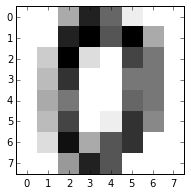

In [27]:
def show_image(image):
    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(3, 3))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

show_image(digits.images[0])

In [28]:
def make_model():
    from sklearn.linear_model import SGDClassifier    
    clf = SGDClassifier(alpha=0.0001, fit_intercept=True, n_iter=200)
    return clf
    
classifier = make_model()

In [29]:
classifier.fit(digits.data, digits.target)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=200, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [30]:
def calculate_accuracy(model, dataset):
    from sklearn import metrics

    predicted = model.predict(dataset.data)
    score = metrics.accuracy_score(dataset.target, predicted)
    return score

print(calculate_accuracy(classifier, digits))

0.968836950473


In [16]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine.pkl") 

['./machine.pkl',
 './machine.pkl_01.npy',
 './machine.pkl_02.npy',
 './machine.pkl_03.npy',
 './machine.pkl_04.npy']

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79 

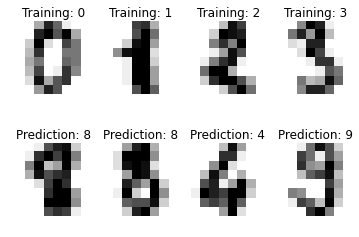

In [31]:
#machine2.pkl

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(digits.images) #讀出資料庫中有幾張照片
data = digits.images.reshape((n_samples, -1))

# 產生SVC分類器
classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練
classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

# Now predict the value of the digit on the second half:
expected = digits.target[n_samples / 2:]
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

images_and_predictions = list(zip(digits.images[n_samples / 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

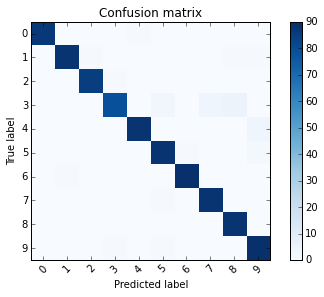

In [32]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    import numpy as np
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(digits.target_names))
    plt.xticks(tick_marks, digits.target_names, rotation=45)
    plt.yticks(tick_marks, digits.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plt.figure()
plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))


In [69]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('C:/Github/number_recognizer/train.txt')
len(train)

1000

In [70]:
target = np.loadtxt('C:/Github/number_recognizer/target.txt')
target = target.astype(int)
len(target)

1000

In [71]:
t = []
for i in range(len(train)):
    t.append(train[i].reshape(8,8))

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       0.48      0.48      0.48        50
          1       0.78      0.57      0.66        49
          2       0.43      0.64      0.51        44
          3       0.45      0.44      0.44        50
          4       0.77      0.63      0.69        52
          5       0.46      0.39      0.42        44
          6       0.57      0.57      0.57        56
          7       0.47      0.55      0.51        44
          8       0.61      0.60      0.61        55
          9       0.53      0.55      0.54        56

avg / total       0.56      0.54      0.55       500


Confusion matrix:
[[24  0  7  4  1  6  6  0  2  0]
 [ 0 28  8  3  0  1  0  7  2  0]
 [ 1  3 28  4  3  0  1  2  0  2]
 [ 7  1  6 22 

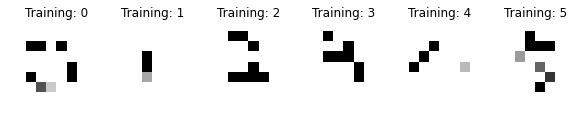

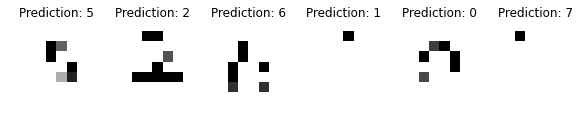

In [76]:
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

images_and_labels = list(zip(t, target))

plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(t) #讀出資料庫中有幾張照片
data = train.reshape((n_samples, -1))

# 產生SVC分類器
#classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練

#X = data[:n_samples / 2]
#y = target[:n_samples / 2]
#X = data
#y = target

'''classifier=svm.SVC(gamma=0.001)
classifier.fit(X,y)'''

##############################################################
'''svc = SVC(kernel="linear")
classifier = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 5),
              scoring='accuracy')
classifier.fit(X,y)
print("Optimal number of features : %d" % classifier.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

print("precision : %s\n" % max(classifier.grid_scores_))'''
##############################################################
'''
for g in range(0,100):
    cl=svm.SVC(gamma= g / 10000.)
    print ("G = %s\n" %(g / 10000.))
    print(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5)))
    print(np.mean(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5))))
'''
##############################################################
'''classifier=svm.SVC(gamma=0.0009)
cl=np.mean(cross_val_score(classifier,X,y,cv=StratifiedKFold(y, 5)))
print("precision : %s\n" % cl)

classifier.fit(X,y)'''
##############################################################
'''
X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5 )
classifier=svm.SVC(gamma=0.001)
classifier.fit(X_train,y_train)'''


# Now predict the value of the digit on the second half:
expected = target[n_samples / 2:]
#expected = y_test
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])
#predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

plt.figure(figsize=(10,5))
images_and_predictions = list(zip(t[n_samples / 2:], predicted))
#images_and_predictions = list(zip(X_test, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(2, 6, index + 7)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Please select the number to show : 999
the number is 7


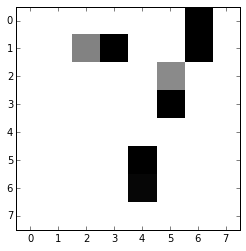

In [1049]:
str_num = input("Please select the number to show : ")
int_num = int(str_num)

print ("the number is %d" %target[int_num])
plt.imshow(train[int_num].reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

train = np.loadtxt('C:/Github/number_recognizer/train_1.txt')
len(train)

1012

In [12]:
target = np.loadtxt('C:/Github/number_recognizer/target_1.txt')
target = target.astype(int)
len(target)

1012

In [3]:
t = []
for i in range(len(train)):
    t.append(train[i].reshape(8,8))

precision : 0.715263690994

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.0009, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.98      0.99        64
          1       0.90      1.00      0.95        47
          2       0.98      0.97      0.98        61
          3       0.97      1.00      0.98        63
          4       1.00      0.96      0.98        45
          5       1.00      0.96      0.98        52
          6       1.00      0.98      0.99        41
          7       0.96      0.90      0.93        49
          8       1.00      1.00      1.00        35
          9       0.92      0.98      0.95        48

avg / total       0.97      0.97      0.97       505


Confusion matrix:
[[63  0  1  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  1 59  0  0  

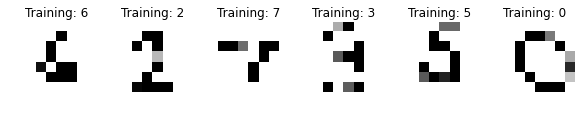

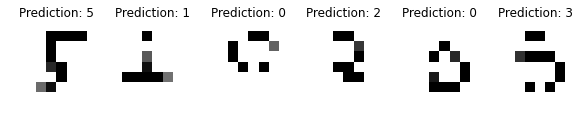

In [4]:
from sklearn import svm, metrics
from sklearn.svm import SVC
from sklearn.cross_validation import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split

images_and_labels = list(zip(t, target))

plt.figure(figsize=(10,5))
for index, (image, label) in enumerate(images_and_labels[:6]):
    plt.subplot(2, 6, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# 資料攤平:1797 x 8 x 8 -> 1797 x 64
# 這裏的-1代表自動計算，相當於 (n_samples, 64)
n_samples = len(t) #讀出資料庫中有幾張照片
data = train.reshape((n_samples, -1))

# 產生SVC分類器
#classifier = svm.SVC(gamma=0.001)

# 用前半部份的資料來訓練


#X = data[:n_samples / 2]
#y = target[:n_samples / 2]
X = data
y = target

'''classifier=svm.SVC(gamma=0.001)
classifier.fit(X,y)
'''
##############################################################
'''svc = SVC(kernel="linear")
classifier = RFECV(estimator=svc, step=1, cv=StratifiedKFold(y, 5),
              scoring='accuracy')
classifier.fit(X,y)
print("Optimal number of features : %d" % classifier.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(classifier.grid_scores_) + 1), classifier.grid_scores_)
plt.show()

print("precision : %s\n" % max(classifier.grid_scores_))'''
##############################################################
'''
for g in range(0,100):
    cl=svm.SVC(gamma= g / 10000.)
    print ("G = %s\n" %(g / 10000.))
    print(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5)))
    print(np.mean(cross_val_score(cl,X,y,cv=StratifiedKFold(y, 5))))
'''
##############################################################
classifier=svm.SVC(gamma=0.0009)
cl=np.mean(cross_val_score(classifier,X,y,cv=StratifiedKFold(y, 5)))
print("precision : %s\n" % cl)

classifier.fit(X,y)
##############################################################
'''
X = data
y = target

X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.5 )
classifier=svm.SVC(gamma=0.001)
classifier.fit(X_train,y_train)
'''


# Now predict the value of the digit on the second half:
expected = target[n_samples / 2:]
#expected = y_test
#利用後半部份的資料來測試分類器，共 899筆資料
predicted = classifier.predict(data[n_samples / 2:])
#predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))

plt.figure(figsize=(10,5))
images_and_predictions = list(zip(t[n_samples / 2:], predicted))
#images_and_predictions = list(zip(X_test, predicted))

for index, (image, prediction) in enumerate(images_and_predictions[:6]):
    plt.subplot(2, 6, index + 7)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    #plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [91]:
from sklearn.externals import joblib

joblib.dump(classifier, "./machine2.pkl") 

['./machine2.pkl',
 './machine2.pkl_01.npy',
 './machine2.pkl_02.npy',
 './machine2.pkl_03.npy',
 './machine2.pkl_04.npy',
 './machine2.pkl_05.npy',
 './machine2.pkl_06.npy',
 './machine2.pkl_07.npy',
 './machine2.pkl_08.npy',
 './machine2.pkl_09.npy',
 './machine2.pkl_10.npy',
 './machine2.pkl_11.npy']